# Visualization : Cam EigenCam GradCam

In [1]:
from cams.visualizer import Visualizer
from utils.image import get_img_list_raf, img_to_input_tensor, pp_images, pp_blended_heatmaps
from utils.labels import get_labels

## Parameters

In [2]:
MODEL_NAME = 'FERplus-impr-std_0124-1040_weights.h5'
LAST_CONV_NAME = 'block3_conv3'
IMG_SHAPE = (100,100,3)
emotion_labels = get_labels(MODEL_NAME)

emotion = 'Sadness'
num_imgs = 10

## Input Images

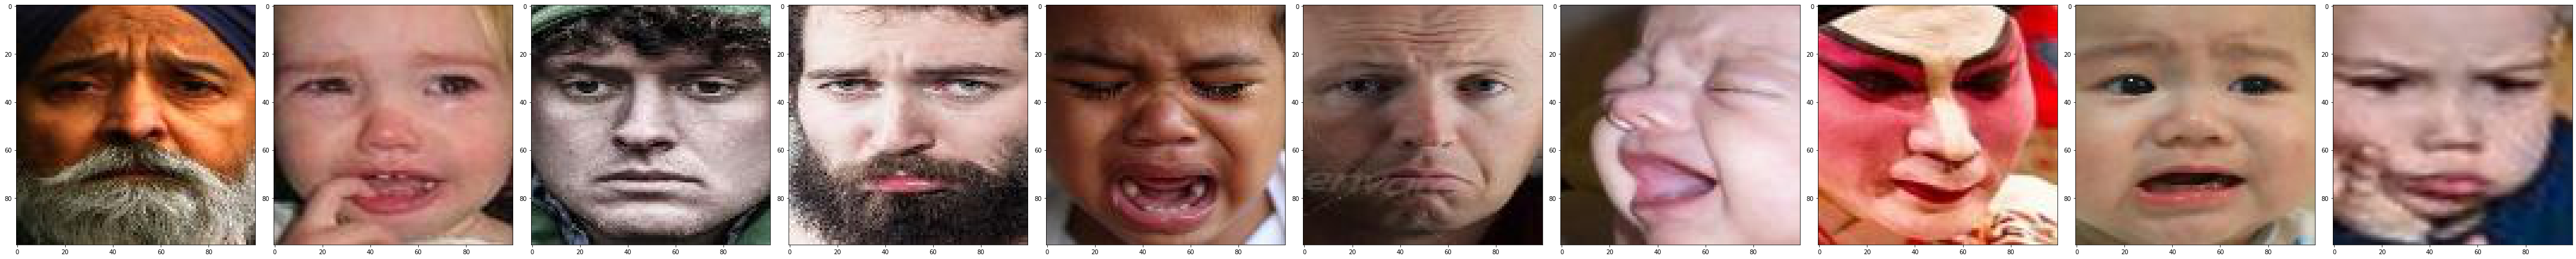

In [3]:
img_list = get_img_list_raf(emotion, num_imgs)
img_tensors = img_to_input_tensor(img_list, IMG_SHAPE)
img_tensors_not_rgb = img_to_input_tensor(img_list, IMG_SHAPE, RGB=False)
pp_images(img_tensors)

## Visualizer

In [4]:
vis = Visualizer(MODEL_NAME, LAST_CONV_NAME, IMG_SHAPE)

Metal device set to: Apple M1


2022-01-28 14:38:11.002474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-28 14:38:11.002587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## get heatmaps : Cam, EigenCam, GradCam

In [5]:
heatmap_CAM, pred_CAM = vis.getCAM(img_tensors_not_rgb)
heatmap_EigenCam, pred_EigenCam = vis.getEigenCAM(img_tensors)
heatmap_EigenCam_p, pred_EigenCam_p = vis.getEigenCAM(img_tensors_not_rgb, True)
heatmap_GradCam, pred_GradCam = vis.getGradCAM(img_tensors)
heatmap_GradCam_p, pred_GradCam_p = vis.getGradCAM(img_tensors_not_rgb, True)

2022-01-28 14:38:11.187923: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-28 14:38:11.243849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 14:38:11.386114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-28 14:38:12.238891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## Result

### blended

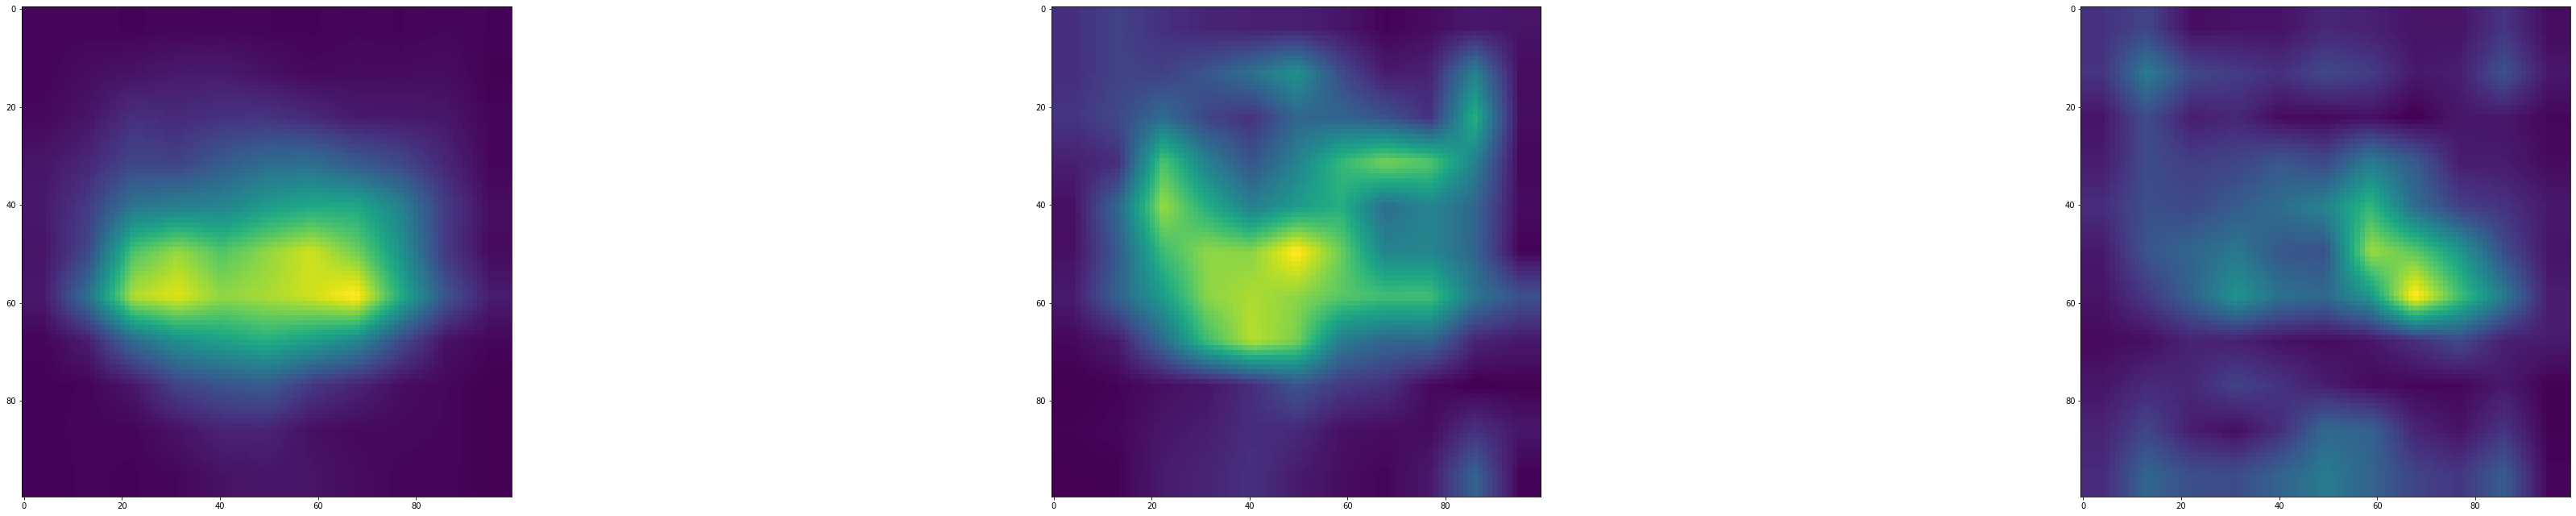

In [6]:
pp_blended_heatmaps([heatmap_CAM,heatmap_EigenCam,heatmap_GradCam], [pred_CAM,pred_EigenCam,pred_EigenCam], 4)

### Cam

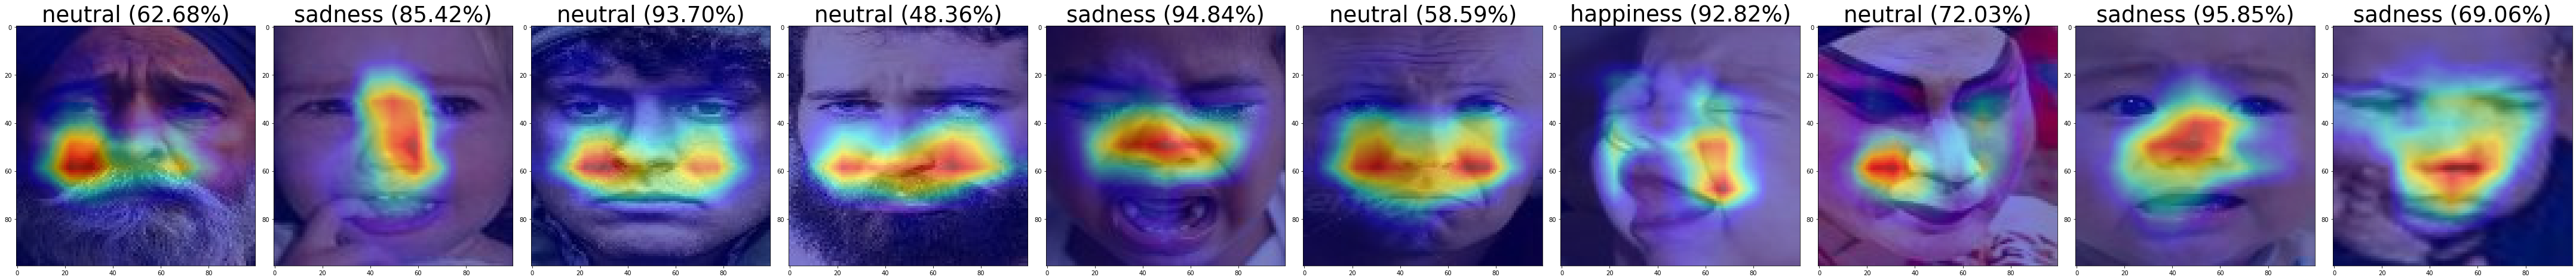

In [7]:
pp_images(img_tensors, heatmap_CAM, pred_CAM, emotion_labels)

### EigenCam

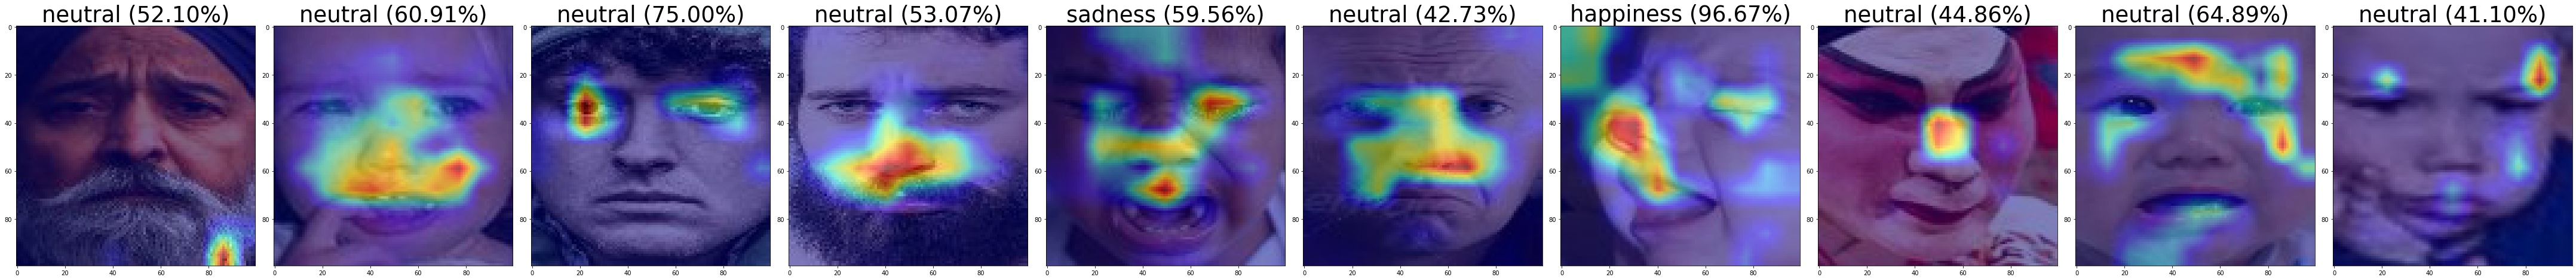

In [8]:
pp_images(img_tensors, heatmap_EigenCam, pred_EigenCam, emotion_labels)

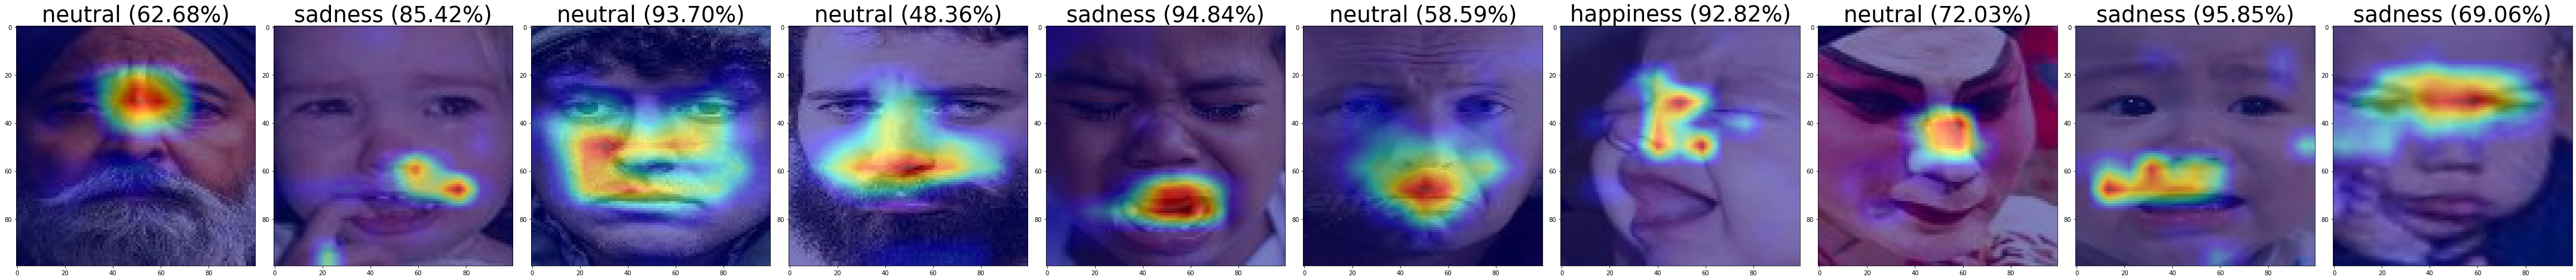

In [9]:
pp_images(img_tensors, heatmap_EigenCam_p, pred_EigenCam_p, emotion_labels)

### GradCam

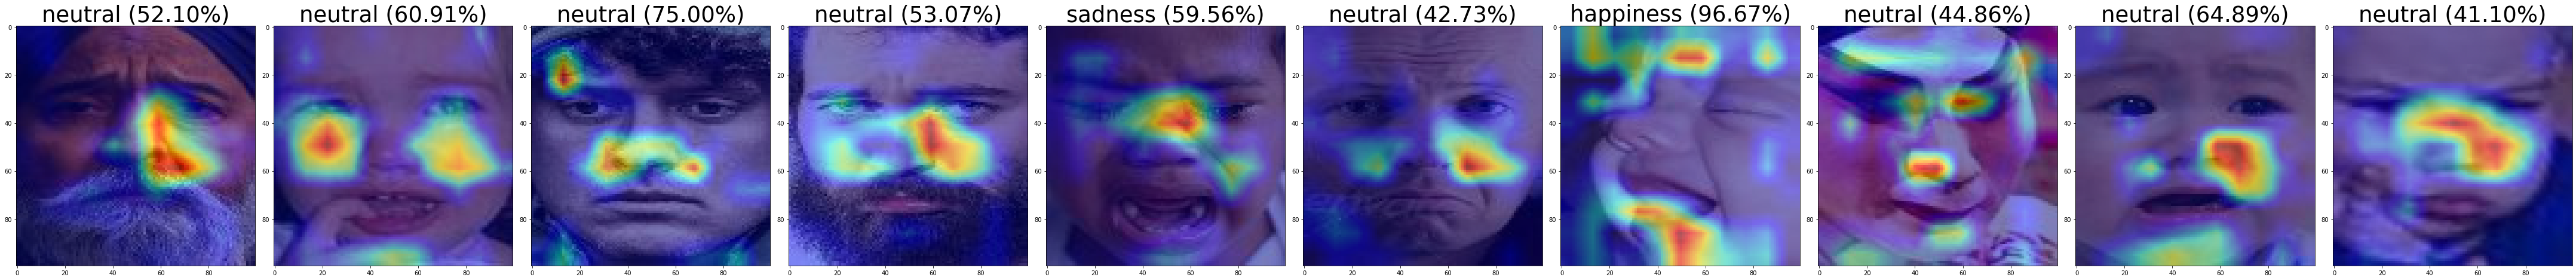

In [10]:
pp_images(img_tensors, heatmap_GradCam, pred_GradCam, emotion_labels)

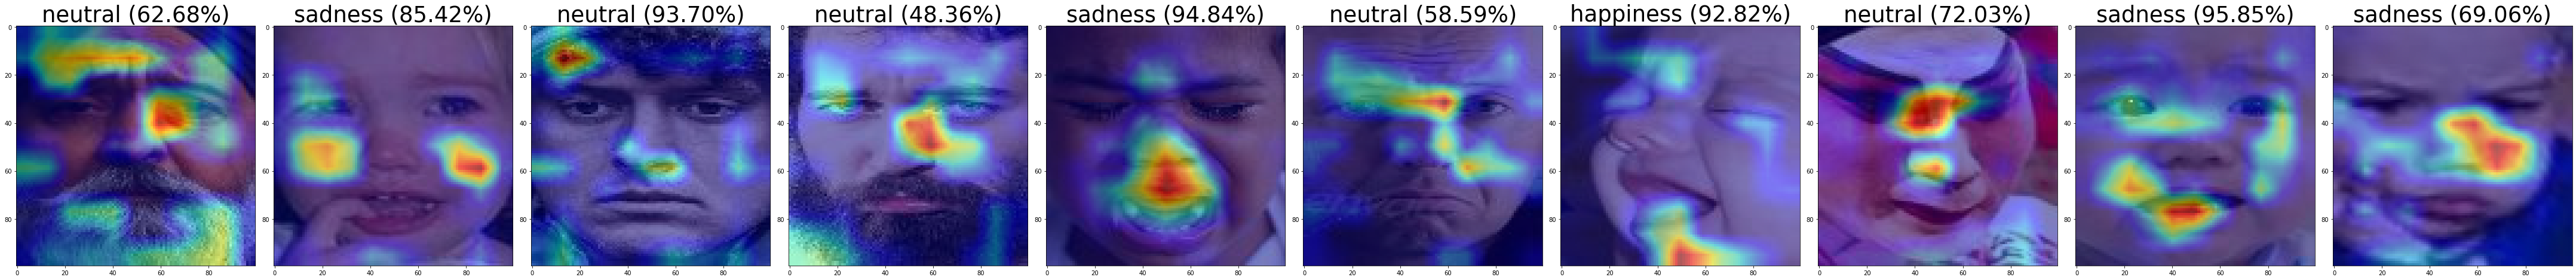

In [11]:
pp_images(img_tensors, heatmap_GradCam_p, pred_GradCam_p, emotion_labels)

['./data/RAF/images/test_1854_aligned.jpg', './data/RAF/images/test_1324_aligned.jpg', './data/RAF/images/test_2052_aligned.jpg', './data/RAF/images/test_1642_aligned.jpg', './data/RAF/images/test_1949_aligned.jpg', './data/RAF/images/test_1753_aligned.jpg', './data/RAF/images/test_2017_aligned.jpg', './data/RAF/images/test_0716_aligned.jpg', './data/RAF/images/test_0952_aligned.jpg', './data/RAF/images/test_2167_aligned.jpg', './data/RAF/images/test_1824_aligned.jpg', './data/RAF/images/test_1262_aligned.jpg', './data/RAF/images/test_0024_aligned.jpg', './data/RAF/images/test_0471_aligned.jpg', './data/RAF/images/test_0145_aligned.jpg', './data/RAF/images/test_1085_aligned.jpg', './data/RAF/images/test_1809_aligned.jpg', './data/RAF/images/test_0264_aligned.jpg', './data/RAF/images/test_1091_aligned.jpg', './data/RAF/images/test_1771_aligned.jpg']

img_list = ['./data/RAF/images/test_2061_aligned.jpg', './data/RAF/images/test_1042_aligned.jpg', './data/RAF/images/test_2204_aligned.jpg', './data/RAF/images/test_1009_aligned.jpg', './data/RAF/images/test_2050_aligned.jpg', './data/RAF/images/test_0593_aligned.jpg', './data/RAF/images/test_0006_aligned.jpg', './data/RAF/images/test_1809_aligned.jpg', './data/RAF/images/test_0738_aligned.jpg', './data/RAF/images/test_1112_aligned.jpg']